# Sequential model

*Dense model 16*
*Dense model 16*
*Dense model 16*
*Dense model 8*
*Dense model 4*
*Dense model 2*
*Epoch 350*

_MSE: 1.31_
15/15 - 0s - loss: 0.3815 - mae: 0.2470 - mse: 0.3815
Testing set Mean Abs Error:  0.25 ibova_0

In [216]:
import pathlib
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [217]:
dataset_path = 'final_ibova_oil_usd_ROC2.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()
# dataset
# 'index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4'


In [218]:
dataset

,Unnamed: 0,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,usd_1,usd_2,usd_3,usd_4,usd_5
0,0,1.852453,5.731218,5.678287,6.704554,4.870696,5.135128,1.852453,5.731218,5.678287,6.704554,4.870696,5.135128,1.852453,5.731218,5.678287,6.704554,4.870696,5.135128
1,1,5.731218,5.678287,6.704554,4.870696,5.135128,5.976096,5.731218,5.678287,6.704554,4.870696,5.135128,5.976096,5.731218,5.678287,6.704554,4.870696,5.135128,5.976096
2,2,5.678287,6.704554,4.870696,5.135128,5.976096,10.159998,5.678287,6.704554,4.870696,5.135128,5.976096,10.159998,5.678287,6.704554,4.870696,5.135128,5.976096,10.159998
3,3,6.704554,4.870696,5.135128,5.976096,10.159998,8.056570,6.704554,4.870696,5.135128,5.976096,10.159998,8.056570,6.704554,4.870696,5.135128,5.976096,10.159998,8.056570
4,4,4.870696,5.135128,5.976096,10.159998,8.056570,9.347764,4.870696,5.135128,5.976096,10.159998,8.056570,9.347764,4.870696,5.135128,5.976096,10.159998,8.056570,9.347764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2387,-2.343976,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-2.343976,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-2.343976,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147
2388,2388,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-1.279721,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182
2389,2389,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-3.354260,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916
2390,2390,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764,-6.276465,-6.729609,-7.903147,-6.691182,-7.227916,-6.595764


# Separando dados de treinamento e teste

In [219]:
train_dataset = dataset.head(1914)
# train_dataset = dataset.sample(frac=0.8,random_state=0)
# test_dataset = dataset.drop(train_dataset.index)
test_dataset = dataset.tail(479)

In [220]:
# Tirando variavel predita do treinamento
train_labels = train_dataset.pop('ibova_0','oil_0','usd_0')
test_labels = test_dataset.pop('ibova_0','oil_0','usd_0')

TypeError: pop() takes 2 positional arguments but 4 were given

# Inspecionando os dados

In [ ]:
# sns.pairplot(train_dataset[['index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4']], diag_kind="kde")

In [ ]:
# sns.pairplot(train_dataset[['index','ibova_0','oil_0','usd_0']], diag_kind="kde")

# Construindo o modelo

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(30, activation='relu', input_shape=[len(train_dataset.keys())]),
    # layers.Dense(32, activation='relu'),
    # layers.Dense(16, activation='relu'),
    # layers.Dense(8, activation='relu'),
    # layers.Dense(2, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 64)                1216      
_________________________________________________________________
dense_103 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_104 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_105 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 3         
Total params: 3,981
Trainable params: 3,981
Non-trainable params: 0
___________________________________________________

## Testando o modelo

In [ ]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
# example_result

In [ ]:
class MSEAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(f'Up to batch {batch}, the average mse is {logs["mse"]:7.2f}')
        

    def on_test_batch_end(self, batch, logs=None):
        print(f'Up to batch {batch}, the average mse is {logs["mse"]:7.2f}')

    def on_epoch_end(self, epoch, logs=None):
        print(f"The average mse for epoch {epoch} is {logs['mse']:7.2f} \n"
            f"and mean absolute error is {logs['mae']:7.2f}")


In [ ]:
# Making a custom Callback

class MSEStopping(keras.callbacks.Callback):
    def __init__(self, mse_threshold, patience):
        super(MSEStopping, self).__init__()
        self.patience = patience
        self.best_weights = None
        self._mse_threshold = mse_threshold

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best 
        self.best = np.Inf


    # def on_epoch_end(self, epoch, batch, logs={}):
    #     trains_mse = logs.get('mse')
    #     self.model.stop_training = trains_mse <= self._mse_threshold
    #     if trains_mse <=  :

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get('mse')
        if current <= mse_threshold:
            print(f'Current is: {current}')
            if np.less(current, self.best):
                self.best = current
                self.wait = 0
                # Record the best weights if current results is better (less).
                self.best_weights = self.model.get_weights()
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.stopped_epoch = epoch
                    self.model.stop_training = True
                    print("Restoring model weights from the end of the best epoch.")
                    self.model.set_weights(self.best_weights)

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get('mse')
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))



In [ ]:
# # current = logs['mse']
# current = logs.get('mse')

# current

# Treinado o modelo

In [ ]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# MSE_callback = MSEStopping(0.1)
# model.fit(x, y, batch_size=8, epochs=1000, callbacks=[acc_callback])

EPOCHS = 500

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[MSEAndErrorPrintingCallback(),MSEStopping(patience=1,mse_threshold=0.0001)])

Up to batch 0, the average mse is  121.05
Up to batch 1, the average mse is  124.52
Up to batch 2, the average mse is   94.87
Up to batch 3, the average mse is   76.12
Up to batch 4, the average mse is   65.78
Up to batch 5, the average mse is   57.66
Up to batch 6, the average mse is   51.16
Up to batch 7, the average mse is   46.99
Up to batch 8, the average mse is   43.48
Up to batch 9, the average mse is   40.53
Up to batch 10, the average mse is   38.53
Up to batch 11, the average mse is   36.65
Up to batch 12, the average mse is   35.44
Up to batch 13, the average mse is   34.69
Up to batch 14, the average mse is   33.40
Up to batch 15, the average mse is   32.39
Up to batch 16, the average mse is   31.43
Up to batch 17, the average mse is   30.75
Up to batch 18, the average mse is   30.19
Up to batch 19, the average mse is   29.45
Up to batch 20, the average mse is   28.68
Up to batch 21, the average mse is   28.15
Up to batch 22, the average mse is   28.36
Up to batch 23, the a

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,6.213111,1.938045,6.213111,4.055383,1.653835,4.055383,5
6,6.053643,1.822571,6.053643,6.716421,2.013842,6.716421,6
7,3.694499,1.472697,3.694499,2.240841,1.192154,2.240841,7
8,3.126988,1.323583,3.126988,22.660276,4.508304,22.660276,8
9,3.484388,1.390759,3.484388,3.721552,1.751165,3.721552,9


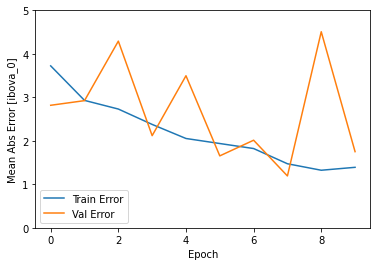

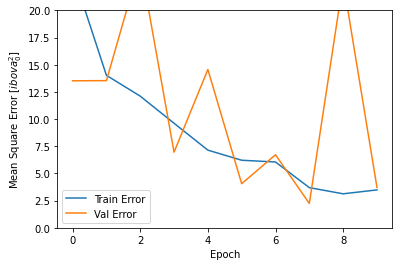

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ibova_0]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ibova_0^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Up to batch 0, the average mse is  169.25
Up to batch 1, the average mse is  102.11
Up to batch 2, the average mse is   77.02
Up to batch 3, the average mse is   61.30
Up to batch 4, the average mse is   55.30
Up to batch 5, the average mse is   49.06
Up to batch 6, the average mse is   46.09
Up to batch 7, the average mse is   43.80
Up to batch 8, the average mse is   40.75
Up to batch 9, the average mse is   39.34
Up to batch 10, the average mse is   37.51
Up to batch 11, the average mse is   36.24
Up to batch 12, the average mse is   35.07
Up to batch 13, the average mse is   34.73
Up to batch 14, the average mse is   34.13
Up to batch 15, the average mse is   33.12
Up to batch 16, the average mse is   32.27
Up to batch 17, the average mse is   31.81
Up to batch 18, the average mse is   31.07
Up to batch 19, the average mse is   30.61
Up to batch 20, the average mse is   29.93
Up to batch 21, the average mse is   29.00
Up to batch 22, the average mse is   28.49
Up to batch 23, the a

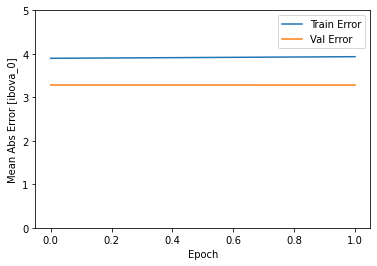

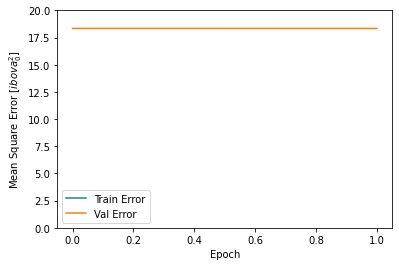

In [ ]:
# model = build_model()

# # O parâmetro patience é o quantidade de epochs para checar as melhoras
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# # history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
# #                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

# history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[MSEAndErrorPrintingCallback(),MSEStopping(patience=1,mse_threshold=0.001)])


# plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ibova_0".format(mae))

15/15 - 0s - loss: 41.1563 - mae: 4.1439 - mse: 41.1563
Testing set Mean Abs Error:  4.14 ibova_0


# Realizando as previsões

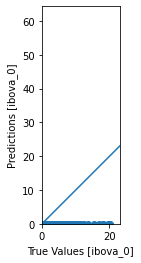

In [ ]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [ibova_0]')
plt.ylabel('Predictions [ibova_0]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# X = tempo
# Y =

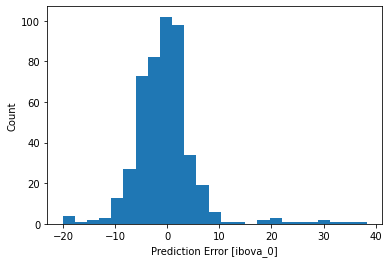

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [ibova_0]")
_ = plt.ylabel("Count")

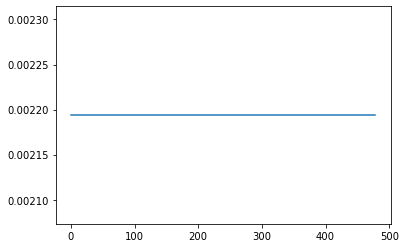

In [ ]:
# Imprimindo previsoes
plt.plot(test_predictions)

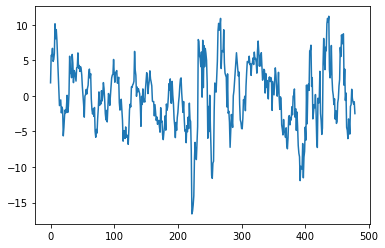

In [ ]:
# Imprimindo valores reais
ibova_test = raw_dataset.ibova_0[:479]
plt.plot(ibova_test)

In [ ]:
# Analisando Medias:

print(f'Massa de teste: {test_predictions.mean()}')
print(f'Massa inicial: {raw_dataset.ibova_0.mean()}')
print(f'Diferenças das médias: {raw_dataset.ibova_0.mean() - test_predictions.mean()}')

Massa de teste: 0.002193876076489687
Massa inicial: 0.3531620515012171
Diferenças das médias: 0.3509681754247274


In [ ]:
# test_dataset